In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats
%matplotlib inline

In [2]:
data = pd.read_excel("NormTemp.xlsx")
temp = data["Temp"]
male_temp = data["Temp"][data["Gender"] == 1]
female_temp = data["Temp"][data["Gender"] == 2]
heart_rate = data["Heart Rate"]

## Finding Mean of Temperature

In [3]:
mean = temp.sum() / temp.size

In [4]:
print("The true population mean is", mean, "F")

The true population mean is 98.24923076923076 F


## Testing Normal Distribution

In [5]:
alpha = 0.05

(array([  4.,   6.,  15.,  26.,  30.,  30.,  15.,   1.,   2.,   1.]),
 array([  96.3 ,   96.75,   97.2 ,   97.65,   98.1 ,   98.55,   99.  ,
          99.45,   99.9 ,  100.35,  100.8 ]),
 <a list of 10 Patch objects>)

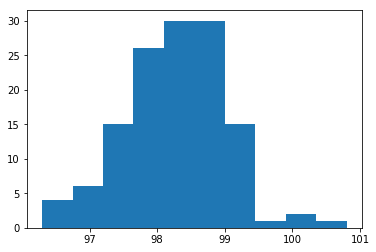

In [6]:
plt.hist(temp)

In [7]:
s, p = sp.stats.normaltest(temp)

In [8]:
if p < alpha:
    print("The distributon is not approximately normal. P value is", p)
elif p > alpha:
    print("The distribution is approximately normal. P value is", p)

The distribution is approximately normal. P value is 0.258747986349


## Checking Abnormality

In [9]:
std = temp.std()

In [10]:
one_std = (mean - std, mean + std)
two_std = (mean - (2*std), mean + (2*std))

### One Standard Deviation = 68%
### Two Standard Deviations = 95%
### Three Standard Deviations = 99.7%

It depends on how we define abnormal. We define temperature as normal if it is close to the mean. We believe that is a temperature is outside of two standard deviations from the mean, then it is considered as abnormal.

In [11]:
two_std_values1 = temp[(temp < two_std[0])]
two_std_values2 = temp[(temp > two_std[1])]
print("Temperatures below", two_std[0], "and temperatures above", two_std[1], "are considered abnormal.")

Temperatures below 96.78286445315287 and temperatures above 99.71559708530866 are considered abnormal.


## Mean Testing

In [12]:
male_mean = male_temp.mean()
female_mean = female_temp.mean()

In [13]:
print("The average male temperature is", male_mean, "and the average female temperature is", female_mean)

The average male temperature is 98.1046153846154 and the average female temperature is 98.39384615384616


In [79]:
s, p = sp.stats.ttest_ind(male_temp, female_temp)
if p < alpha:
    print("p-value:", p)
    print("We fail to reject the null hypothesis that the mean is similar")
elif p > alp

-2.28543453817 0.0239318831224


## Variance Testing

In [14]:
male_variance = male_temp.var()
female_variance = female_temp.var()

In [15]:
print("The variance of male temperature is", male_variance, "and the variance of female temperature is", female_variance)

The variance of male temperature is 0.4882596153846146 and the variance of female temperature is 0.5527740384615372


In [80]:
F = male_variance / female_variance
male_df = len(male_temp) - 1
female_df = len(female_temp) - 1

p_value = sp.stats.f.cdf(F, male_df, female_df)
if p_value > alpha:
    print("p-value is", p_value)
    print("Reject null hypothesis that the variance are similar")
else:
    print("p-value is", p_value)
    print("Fail to reject the null hypothesis that the variance are similar")

p-value is 0.31054184939
Reject null hypothesis that the variance are similar


## Heart Rate vs Body Temperature

In [16]:
m, b, r, p, std_error = sp.stats.linregress(temp, heart_rate)

In [17]:
f = lambda x: m*x + b

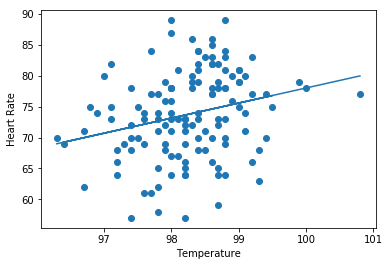

In [18]:
plt.scatter(temp, heart_rate)
plt.plot(temp, f(temp))
plt.xlabel("Temperature")
plt.ylabel("Heart Rate")

# Part 2

In [19]:
import seaborn as sns

In [20]:
data_2 = pd.read_excel("Mortality.xlsx")

In [21]:
data_2

,Exact Age,Death Probability(M),Male Number of Lives,Life Expectancy(M),Death Probability(F),Female number of Lives,Life Expectancy(F)
0,0,0.006322,100000,76.33,0.005313,100000,81.11
1,1,0.000396,99368,75.81,0.000346,99469,80.54
2,2,0.000282,99328,74.84,0.000221,99434,79.57
3,3,0.000212,99300,73.86,0.000162,99412,78.59
4,4,0.000186,99279,72.88,0.000131,99396,77.60
5,5,0.000162,99261,71.89,0.000116,99383,76.61
6,6,0.000144,99245,70.90,0.000106,99372,75.62
7,7,0.000129,99231,69.91,0.000098,99361,74.63
8,8,0.000114,99218,68.92,0.000091,99351,73.64
9,9,0.000100,99206,67.93,0.000086,99342,72.64


In [22]:
male_number_lives = data_2["Male Number of Lives"]
female_number_lives = data_2["Female number of Lives"]

In [23]:
male_number_lives

0      100000
1       99368
2       99328
3       99300
4       99279
5       99261
6       99245
7       99231
8       99218
9       99206
10      99197
11      99187
12      99177
13      99164
14      99144
15      99114
16      99074
17      99024
18      98963
19      98889
20      98802
21      98701
22      98588
23      98464
24      98335
25      98204
26      98072
27      97937
28      97801
29      97662
        ...  
90      18107
91      15128
92      12381
93       9906
94       7733
95       5878
96       4348
97       3130
98       2194
99       1500
100      1001
101       652
102       413
103       254
104       151
105        87
106        48
107        26
108        13
109         6
110         3
111         1
112         1
113         0
114         0
115         0
116         0
117         0
118         0
119         0
Name: Male Number of Lives, Length: 120, dtype: int64

In [24]:
male_death_at_age = []
for e in range(0, len(male_number_lives) - 1):
    male_death_at_age.append(male_number_lives[e] - male_number_lives[e + 1])
male_death_at_age = pd.Series(np.array(male_death_at_age))
male_death_at_age_probability = male_death_at_age / data_2["Male Number of Lives"][0]
male_death_at_age_probability

0      0.00632
1      0.00040
2      0.00028
3      0.00021
4      0.00018
5      0.00016
6      0.00014
7      0.00013
8      0.00012
9      0.00009
10     0.00010
11     0.00010
12     0.00013
13     0.00020
14     0.00030
15     0.00040
16     0.00050
17     0.00061
18     0.00074
19     0.00087
20     0.00101
21     0.00113
22     0.00124
23     0.00129
24     0.00131
25     0.00132
26     0.00135
27     0.00136
28     0.00139
29     0.00142
        ...   
89     0.03163
90     0.02979
91     0.02747
92     0.02475
93     0.02173
94     0.01855
95     0.01530
96     0.01218
97     0.00936
98     0.00694
99     0.00499
100    0.00349
101    0.00239
102    0.00159
103    0.00103
104    0.00064
105    0.00039
106    0.00022
107    0.00013
108    0.00007
109    0.00003
110    0.00002
111    0.00000
112    0.00001
113    0.00000
114    0.00000
115    0.00000
116    0.00000
117    0.00000
118    0.00000
Length: 119, dtype: float64

In [25]:
female_death_at_age = []
for e in range(0, len(female_number_lives) - 1):
    female_death_at_age.append(female_number_lives[e] - female_number_lives[e + 1])
female_death_at_age = pd.Series(np.array(female_death_at_age))
female_death_at_age_probability = female_death_at_age / data_2["Female number of Lives"][0]
female_death_at_age_probability

0      0.00531
1      0.00035
2      0.00022
3      0.00016
4      0.00013
5      0.00011
6      0.00011
7      0.00010
8      0.00009
9      0.00008
10     0.00009
11     0.00008
12     0.00010
13     0.00013
14     0.00015
15     0.00019
16     0.00023
17     0.00027
18     0.00030
19     0.00034
20     0.00037
21     0.00040
22     0.00044
23     0.00047
24     0.00049
25     0.00052
26     0.00055
27     0.00057
28     0.00060
29     0.00064
        ...   
89     0.03881
90     0.03839
91     0.03728
92     0.03547
93     0.03296
94     0.02990
95     0.02630
96     0.02242
97     0.01853
98     0.01482
99     0.01150
100    0.00872
101    0.00646
102    0.00466
103    0.00326
104    0.00222
105    0.00146
106    0.00092
107    0.00056
108    0.00032
109    0.00018
110    0.00009
111    0.00005
112    0.00002
113    0.00001
114    0.00000
115    0.00000
116    0.00000
117    0.00000
118    0.00000
Length: 119, dtype: float64

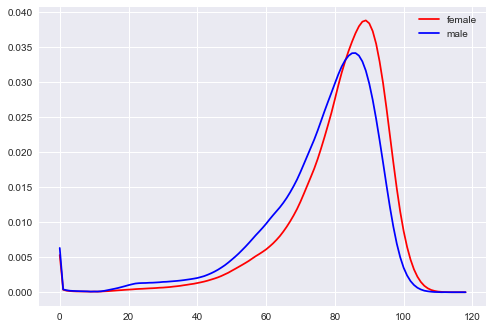

In [26]:
plt.plot(female_death_at_age_probability, label="female", color='r')
plt.plot(male_death_at_age_probability, label="male", color='b')
plt.legend()

## Finding Mean, Median, Mode

### Male

#### Mean

In [27]:
male_mean = 0
for i in range(0, 119):
    male_mean += male_death_at_age_probability.index[i] * male_death_at_age_probability[i]
male_mean

75.830420000000004

#### Median

In [66]:
male_sorted_prob = sorted(male_death_at_age_probability)
male_sorted_prob[int(np.ceil(len(male_sorted_prob) / 2))]

0.00249

In [67]:
male_death_at_age_probability[male_death_at_age_probability == 0.00249]

43    0.00249
dtype: float64

## Median is 43??

In [29]:
male_death_at_age_probability[:114].mode()

0    0.00013
dtype: float64

### Female

In [30]:
female_mean = 0
for i in range(0,119):
    female_mean += female_death_at_age_probability.index[i] * female_death_at_age_probability[i]
female_mean

80.613650000000021

In [69]:
female_sorted_prob = sorted(female_death_at_age_probability)
female_sorted_prob[int(np.ceil(len(female_sorted_prob) / 2))]

0.0022200000000000002

In [70]:
female_death_at_age_probability[female_death_at_age_probability == 0.0022200000000000002]

104    0.00222
dtype: float64

In [32]:
female_death_at_age_probability[:114].mode()

0    0.00009
dtype: float64

## Percentage of people who die before each mean, median, mode

In [57]:
sums = 0
counter = 0
for i in male_death_at_age_probability:
    sums += i
    counter += 1
    if sums >= 0.05:
        print(counter)
        break

44
